In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import StandardScaler

#

In [3]:
#importing raw data

In [4]:
raw_data = pd.read_csv('car_data_.csv')

In [5]:
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4
...,...,...,...,...,...,...,...,...,...
4340,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,S 350
4341,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,535
4342,BMW,8000.0,sedan,194,2.0,Petrol,yes,1985,520
4343,Toyota,14200.0,sedan,31,NaN,Petrol,yes,2014,Corolla


In [6]:
data = raw_data.copy()

In [7]:
data.describe(include='all')


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


Our dataset contains several missing values in key features. Since our linear regression model requires numerical inputs, we need to handle these missing values by either imputing them or removing the affected rows. <br>Additionally, the dataset contains some extreme price values. The maximum price is 300,000, while the mean price is around 19,418, indicating the presence of significant outliers. These outliers can distort our model’s predictions, so we need to remove them or apply transformations to make the data more representative

In [8]:
data  = data.drop(['Model'],axis=1) #removing feature model
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [9]:
data_no_mv = data.dropna(axis=0)  ## data with no missing values
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

## Feature Selection

In [10]:
## if p>0.05 then we can disregard that feature
x1 = data_no_mv['Mileage']
y = data_no_mv['Price']
x = x1.values.reshape(-1,1)
f_regression(x,y)[1].round(3)


array([0.])

In [11]:
## if p>0.05 then we can disregard that feature
x1 = data_no_mv['EngineV']
y = data_no_mv['Price']
x = x1.values.reshape(-1,1)
f_regression(x,y)[1].round(3)


array([0.])

In [12]:
## if p>0.05 then we can disregard that feature
x1 = data_no_mv['Year']
y = data_no_mv['Price']
x = x1.values.reshape(-1,1)
f_regression(x,y)[1].round(3)


array([0.])

# Visualizing Data

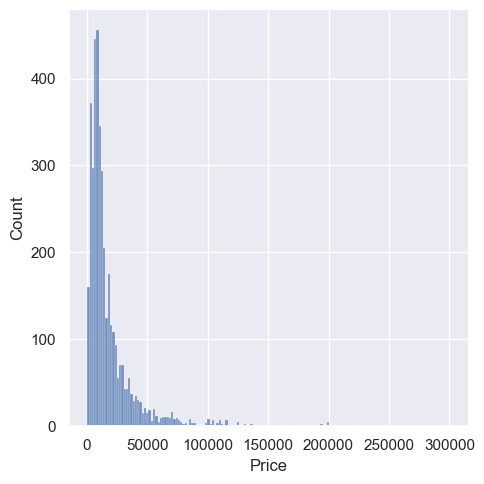

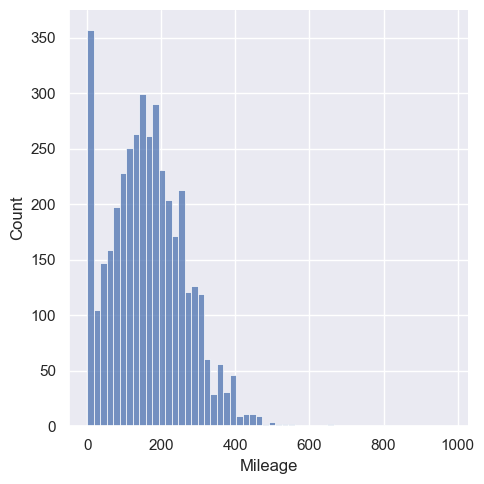

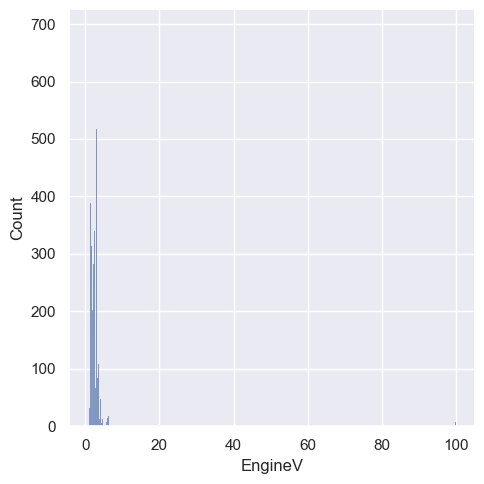

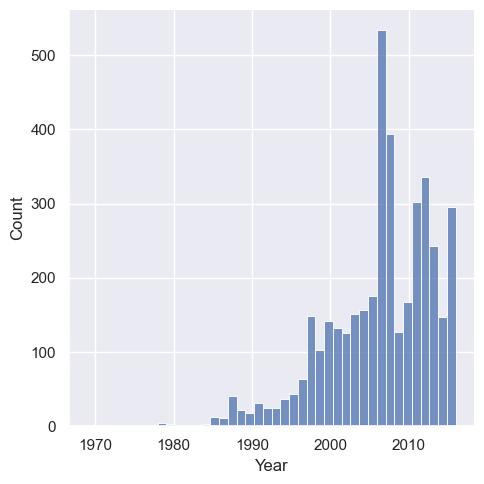

In [13]:
sns.displot(data_no_mv['Price']) ## have outliers to the right
sns.displot(data_no_mv['Mileage']) ## have outliers to the right
sns.displot(data_no_mv['EngineV']) ## typically <6.5
sns.displot(data_no_mv['Year']) ## have outliers to the left

# Removing outliers

C:\Users\sharm\AppData\Local\Temp\ipykernel_19768\3237507767.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data3['Price'])


<Axes: xlabel='Price', ylabel='Density'>

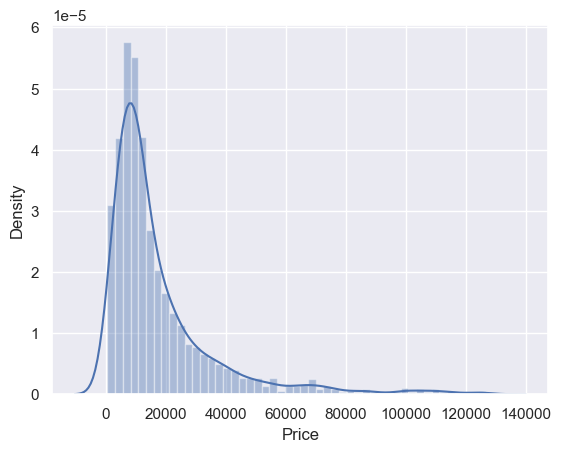

In [14]:
q = data_no_mv['Price'].quantile(.99)
data3 = data_no_mv[data_no_mv['Price']<q]
sns.distplot(data3['Price'])

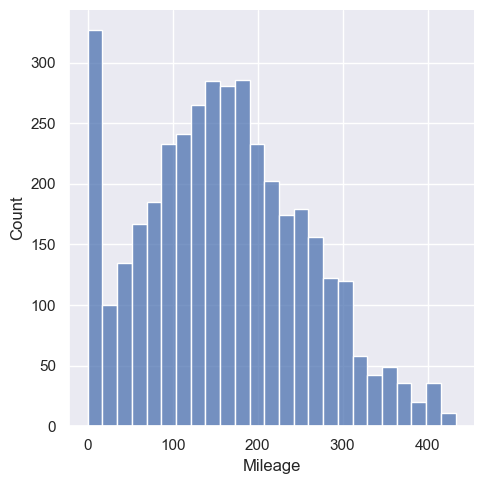

In [15]:
q = data_no_mv['Mileage'].quantile(.99)
data4 = data3[data3['Mileage']<q]
sns.displot(data4['Mileage'])

In [16]:
data5 = data4[data4['EngineV']<6.5]

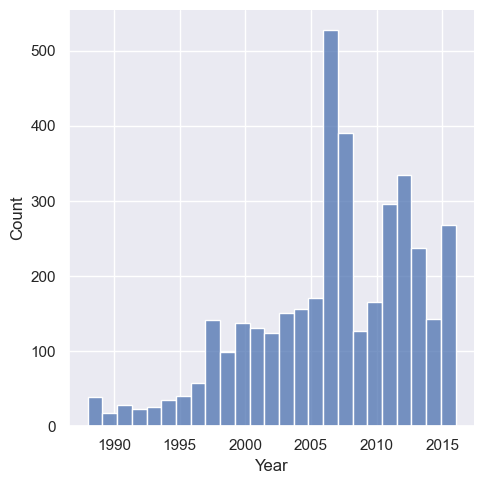

In [17]:
q = data5['Year'].quantile(0.01)
data6 = data5[data5['Year']>q]
sns.displot(data6['Year'])

In [18]:
data_cleaned = data6.reset_index(drop=True)
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3861,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3862,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3863,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3864,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


#

## Now,checking assumptions of Linear Regression (OLS)

### 1-Linearity 

Ensuring the relationship b/w predictors and target variable is linear

Text(0.5, 1.0, 'Price vs Year ')

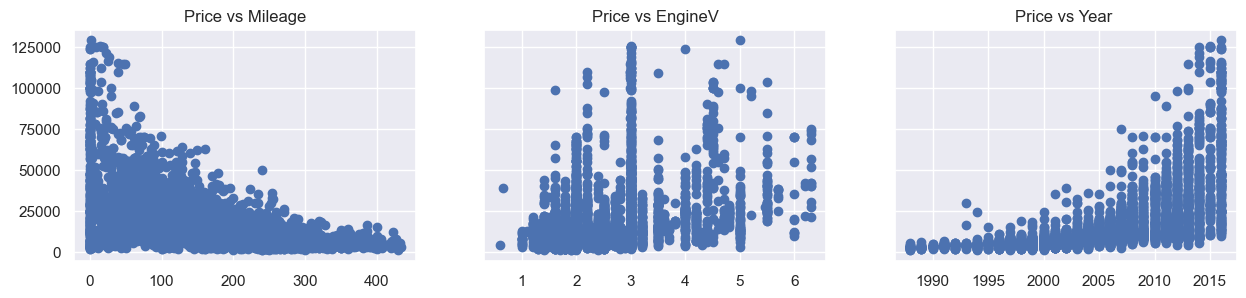

In [19]:
fx ,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize =(15,3))
ax1.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax1.set_title('Price vs Mileage')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price vs EngineV')
ax3.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax3.set_title('Price vs Year ')

The predictor`s does not have relationship with target,<br>Price is in exponential form<br>Tranforming Price using Log

In [20]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['Log Prices'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Log Prices
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3861,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3862,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3863,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3864,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


Text(0.5, 1.0, 'log Price vs Year ')

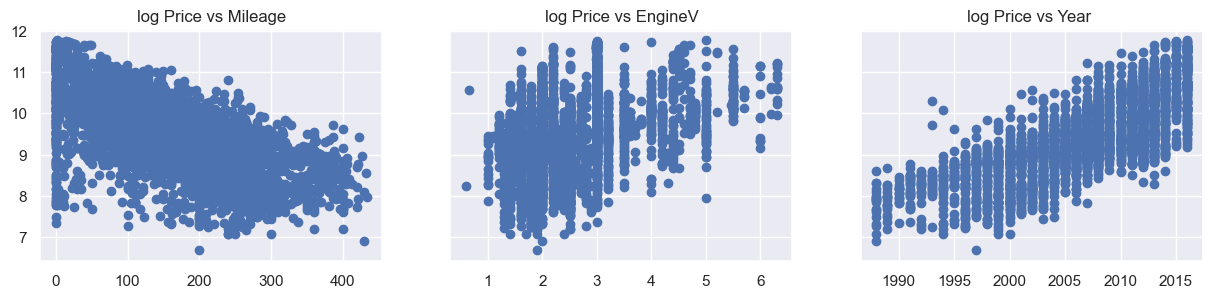

In [21]:
fx ,(ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize =(15,3))
ax1.scatter(data_cleaned['Mileage'],data_cleaned['Log Prices'])
ax1.set_title('log Price vs Mileage')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Log Prices'])
ax2.set_title('log Price vs EngineV')
ax3.scatter(data_cleaned['Year'],data_cleaned['Log Prices'])
ax3.set_title('log Price vs Year ')

In [22]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### 2-MULTICOLLINEARITY

In [23]:
## Its logical that year and mileage will be correalated
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','EngineV','Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [24]:
vif

,VIF,Features
0,3.794319,Mileage
1,7.660317,EngineV
2,10.360888,Year


## IF VIF = 1 NO MULTICOLLINEARITY <bR>IF 1<VIF<5 PERFECTLY OKAY <BR>  IF VIF>10 remove that feature

In [25]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

In [26]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)
data_with_dummies.head()
data_preprocessed = data_with_dummies.copy()

In [27]:
## Its logical that year and mileage will be correalated
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_preprocessed[['Mileage','EngineV']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns

In [28]:
vif

,VIF,Features
0,2.804998,Mileage
1,2.804998,EngineV


There will be no AutoCorrelation as it does not comes from a TIME SERIES data ,As it is a snapshot of a Dealership with different seller /owners,so there is no reason that they will be dependent on each other <br>for larger data normality is asssumed and by log transformation it has equal variance

### DECLEARING INPUTS AND TARGETS

In [29]:
inputs = data_preprocessed.drop(['Log Prices'],axis=1)
target = data_preprocessed['Log Prices']

In [30]:
scaler = StandardScaler()
scaler.fit(inputs)
inputs_scaled = scaler.transform(inputs)

## Train Test split data

In [31]:
x_train,x_test,y_train,y_test = train_test_split(inputs_scaled,target,test_size=0.2,random_state=365)

### create Regression

In [32]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

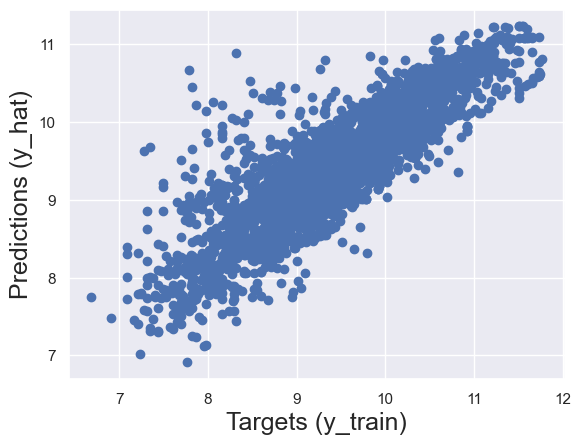

In [33]:
yhat = reg.predict(x_train)
plt.scatter(y_train,yhat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

In [34]:
reg.score(x_train,y_train) ### our model explains 74% variability of the data

0.7415645182486198

In [35]:
reg.intercept_

9.413280072375791

In [36]:
reg.coef_

array([-0.44838367,  0.21092609,  0.01217236,  0.01091936, -0.13381235,
       -0.18243069, -0.05551416, -0.08742151, -0.15127967, -0.10115164,
       -0.19711525, -0.1281566 , -0.16265036, -0.12418232, -0.03326347,
       -0.14940858,  0.31944559])

In [37]:
reg_summary = pd.DataFrame(inputs.columns.values,columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.448384
1,EngineV,0.210926
2,Brand_BMW,0.012172
3,Brand_Mercedes-Benz,0.010919
4,Brand_Mitsubishi,-0.133812
5,Brand_Renault,-0.182431
6,Brand_Toyota,-0.055514
7,Brand_Volkswagen,-0.087422
8,Body_hatch,-0.151280
9,Body_other,-0.101152


### Weights interpretation
### 1- continous varaibles : 
1- A positive weight shows that a feature increases in value, so do the log_price, and 'price' respectively
<br>2- A negative weight shows that as a feature increases in value, log_value and 'price' decreases
### Dummy Variables
1 A positive weight shows that the respective category (Brand) is more expensive than the benchmark (Audi here) eg; here( BMW- coef is positive so on average a BMV will be more expensive then Audi)
<br>2-A negative weight shows that the respective category (Brand) is less expensive than the Benchmark(Audi(The variable we discard while making dummies)) <br> eg(on average Mitsubishi will be cheaper than an Audi)

# Testing

In [38]:
y_test = y_test.reset_index(drop=True)

y_hat_test = reg.predict(x_test)
df_pf = pd.DataFrame(np.exp(y_hat_test),columns=['Predictions']) 
df_pf['Targets']= np.exp(y_test)
df_pf

,Predictions,Targets
0,10650.438709,2300.0
1,8041.555683,13200.0
2,6799.069945,8100.0
3,7606.977689,6400.0
4,11309.799759,9150.0
...,...,...
769,14874.949923,29500.0
770,5735.556226,5300.0
771,13623.775492,18300.0
772,28096.133846,68500.0


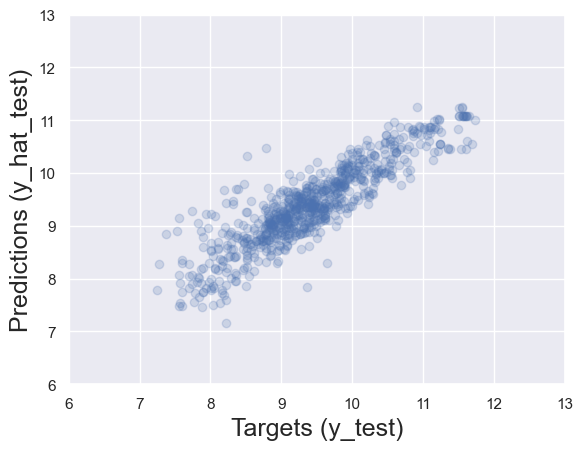

In [39]:
plt.scatter(y_test,y_hat_test,alpha=0.2) # specifies the opacity
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [40]:
df_pf['Residuals'] = df_pf['Targets'] - df_pf['Predictions']
df_pf['Difference%'] = np.absolute(df_pf['Residuals']/df_pf['Targets']*100)
df_pf
### Examinig the residual is the same as examinig the heart of the algorithm as OLS framwork is based on minimizing the SSE

,Predictions,Targets,Residuals,Difference%
0,10650.438709,2300.0,-8350.438709,363.062553
1,8041.555683,13200.0,5158.444317,39.079124
2,6799.069945,8100.0,1300.930055,16.060865
3,7606.977689,6400.0,-1206.977689,18.859026
4,11309.799759,9150.0,-2159.799759,23.604369
...,...,...,...,...
769,14874.949923,29500.0,14625.050077,49.576441
770,5735.556226,5300.0,-435.556226,8.218042
771,13623.775492,18300.0,4676.224508,25.553139
772,28096.133846,68500.0,40403.866154,58.983746


In [41]:
df_pf.describe()

,Predictions,Targets,Residuals,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16170.746881,18612.010504,2441.263622,33.814041
std,13742.956902,20953.006281,10835.145339,48.272151
min,1284.843010,1400.000000,-29171.365746,0.056793
25%,7489.039002,6999.250000,-2013.351405,11.277214
50%,11561.730997,11500.000000,150.474574,23.239276
75%,19726.158072,20500.000000,3293.698161,39.023878
max,77447.771561,124000.000000,80642.598057,507.418465


In [42]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format',lambda x: '%.2f' %x)
df_pf.sort_values(by=['Difference%'])

,Predictions,Targets,Residuals,Difference%
264,11493.47,11500.00,6.53,0.06
742,16985.25,16999.00,13.75,0.08
60,12486.36,12500.00,13.64,0.11
127,23257.55,23200.00,-57.55,0.25
308,8876.92,8900.00,23.08,0.26
242,7478.35,7500.00,21.65,0.29
698,30600.22,30500.00,-100.22,0.33
379,17733.15,17800.00,66.85,0.38
114,27429.73,27300.00,-129.73,0.48
317,11560.12,11500.00,-60.12,0.52
